<a href="https://colab.research.google.com/github/kzemla/dw_matrix_road_sigh/blob/master/day4_road_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np

import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sigh'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sigh


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']


In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [6]:
model = Sequential([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape), 

   Flatten(),

   Dense(num_classes, activation='softmax'),

])

#model.summary()

model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 4s 3ms/step - loss: 8.3999 - accuracy: 0.7922


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape), 

   Flatten(),

   Dense(num_classes, activation='softmax'),
   ])
  
def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])



  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      vaidation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
 
  )

  return model

In [11]:
model = get_cnn_v1(input_shape, num_classes)
model_trained =train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 2s 7ms/step - loss: 22.3081 - accuracy: 0.7168
Epoch 2/5
272/272 [==============================] - 2s 7ms/step - loss: 0.2072 - accuracy: 0.9545
Epoch 3/5
272/272 [==============================] - 2s 7ms/step - loss: 0.1243 - accuracy: 0.9713
Epoch 4/5
272/272 [==============================] - 2s 7ms/step - loss: 0.1014 - accuracy: 0.9766
Epoch 5/5
272/272 [==============================] - 2s 7ms/step - loss: 0.0824 - accuracy: 0.9803


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score ) :


  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)



In [0]:
def train_and_predict(model):
  
  model_trained =train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)


In [28]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),


   Flatten(),

   Dense(1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
   ])



train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 2s 8ms/step - loss: 6.0678 - accuracy: 0.2367
Epoch 2/5
272/272 [==============================] - 2s 7ms/step - loss: 1.5281 - accuracy: 0.5424
Epoch 3/5
272/272 [==============================] - 2s 7ms/step - loss: 0.8775 - accuracy: 0.7308
Epoch 4/5
272/272 [==============================] - 2s 7ms/step - loss: 0.5314 - accuracy: 0.8376
Epoch 5/5
272/272 [==============================] - 2s 7ms/step - loss: 0.3714 - accuracy: 0.8854


0.8791383219954648

In [17]:
y_pred_prob[400]

array([2.9031937e-05, 3.8667466e-05, 2.5362931e-14, 4.2088542e-18,
       9.9993229e-01, 9.3815489e-09, 1.4255159e-25, 1.6312240e-16,
       3.9426641e-17, 2.7063994e-20, 2.6440257e-22, 4.3262309e-21,
       5.2163011e-21, 1.0156249e-22, 9.0186231e-31, 2.0764817e-24,
       1.8829149e-15, 1.9132981e-28, 1.9810837e-23, 1.1207260e-37,
       3.7113746e-30, 4.3915292e-35, 2.7467526e-29, 1.9522651e-26,
       3.7030829e-25, 6.7490575e-28, 2.2558345e-29, 2.6677894e-33,
       6.1388999e-21, 4.8199975e-31, 2.9426245e-28, 1.1125691e-29,
       4.4608548e-28, 1.1991769e-27, 7.2454198e-32, 1.2402946e-21,
       1.2461460e-30, 4.9115514e-19, 5.2612117e-26, 1.9905456e-30,
       6.8124702e-24, 2.7916489e-28, 2.8474910e-28], dtype=float32)

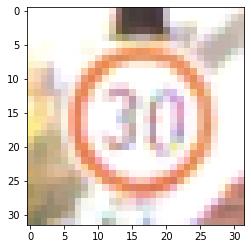

In [16]:
plt.imshow(X_test[400])

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']

In [20]:
labels_dict[ np.argmax( y_pred_prob[400])]

'Speed limit (70km/h)'

In [29]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
   Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),


   Flatten(),

   Dense(1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
   ])



train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 3s 11ms/step - loss: 2.5697 - accuracy: 0.5223
Epoch 2/5
272/272 [==============================] - 3s 10ms/step - loss: 0.5248 - accuracy: 0.8497
Epoch 3/5
272/272 [==============================] - 3s 10ms/step - loss: 0.3017 - accuracy: 0.9109
Epoch 4/5
272/272 [==============================] - 3s 10ms/step - loss: 0.2105 - accuracy: 0.9405
Epoch 5/5
272/272 [==============================] - 3s 10ms/step - loss: 0.1522 - accuracy: 0.9551


0.9691609977324263

In [35]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),


   Flatten(),

   Dense(1024, activation='relu'),
   Dropout(0.3),

   Dense(num_classes, activation='softmax'),
   ])


train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.5884 - accuracy: 0.2986
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.8642 - accuracy: 0.7361
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.4177 - accuracy: 0.8700
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2698 - accuracy: 0.9161
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2003 - accuracy: 0.9391


0.9659863945578231

In [37]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
   Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),

   Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'), 
   Conv2D(filters=64, kernel_size=(3,3), activation='relu'), 
   MaxPool2D(), 
   Dropout(0.3),


   Flatten(),

   Dense(1024, activation='relu'),
   Dropout(0.3),
   
   Dense(1024, activation='relu'),
   Dropout(0.3),


   Dense(num_classes, activation='softmax'),
   ])


train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 3.0101 - accuracy: 0.2149
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 1.1034 - accuracy: 0.6471
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.5122 - accuracy: 0.8346
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3186 - accuracy: 0.9013
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2227 - accuracy: 0.9321


0.9734693877551021

In [0]:
model.compile(loss='category_crossentropy', optimizer='Adam', metrics=)
model.train(X_train_gray, )

In [47]:
X_train_gray.reshape(-1, 32, 32, 1).shape

(34799, 32, 32, 1)

ERROR! Session/line number was not unique in database. History logging moved to new session 66


In [0]:
from tensorflow.keras.layers import Conv1D

In [0]:
X_train_gray = color.rgb2grey( X_train ).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2grey( X_test ).reshape(-1, 32, 32, 1)

In [59]:
model = get_cnn_v5((32, 32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 13ms/step - loss: 2.7345 - accuracy: 0.2399
Epoch 2/5
272/272 [==============================] - 3s 12ms/step - loss: 0.6058 - accuracy: 0.7984
Epoch 3/5
272/272 [==============================] - 3s 13ms/step - loss: 0.2506 - accuracy: 0.9191
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1687 - accuracy: 0.9456
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1247 - accuracy: 0.9602


0.9696145124716553